### FE630 - Homework #1

**Author**: Sid Bhatia

**Date**: March 3rd, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Papa Momar Ndiaye

#### Problem #1 - Utility Functions

##### 1. Log Utility (15 pts)

a. **Certainty Equivalent and Risk Premium** (5 pts)

An investor whose initial wealth is $\$1000$ is offered an opportunity to play a fair game with 2 possible outcomes: winning $\$350$ with a probability of $1/3$ or losing $\$150$ with a probability of $2/3$. The investor utility function is the natural logarithm of his wealth, $u(W) = \ln(W)$.

- What is the Certainty Equivalent of this risky game?
- What is the exact Risk Premium of this risky game?
- How good is the approximation obtained by using a Taylor series expansion?

First, let's define some terms: 
- **Certainty Equivalent (CE)**: The guaranteed amount of money that an investor considers equivalent to a risky gamble. It's the amount where the investor is indifferent between the certain payment and the risky gamble.
- **Risk Premium (RP)**: The difference between the expected return of the risky gamble and the certainty equivalent. It represents the extra amount an investor needs to be willing to participate in the risky gamble.
- **Utility Function**: In this case, $u(W) = \ln(W)$, where $W$ is wealth. This function represents the investor's satisfaction or utility with different levels of wealth.

Given:
- Initial wealth, $W_0 = \$1000$
- Win amount, $W_{ \text{win} } = \$350$ with probability $p_{\text{win}} = \frac{1}{3}$
- Loss amount, $W_{ \text{loss} } = -\$150$ with probability $p_{\text{loss}} = \frac{2}{3}$

We can calculate the expected utility of the gamble, find the certainty equivalent by equating the expected utility to the utility of the certainty equivalent, and then calculate the risk premium. Additionally, we'll use a Taylor series expansion around the initial wealth to approximate the expected utility and compare it.

As such, we will do the following steps:
1. Calculate the *expected utility* of the game.
2. Find the *certainty equivalent (CE)* by setting the expected utility equal to the utility of the CE and solving for CE.
3. Calculate the *risk premium* as the difference between the expected wealth and the certainty equivalent.
4. Compare the *exact expected utility* to the approximation obtained by using a *Taylor series expansion* around the initial wealth.

In [8]:
import numpy as np
from scipy.optimize import fsolve
from typing import Callable

def utility(W: float) -> float:
    """
    Calculate the utility of wealth using a natural logarithm.

    Parameters:
    - W (float): Wealth.

    Returns:
    - float: Utility of the wealth.
    """
    return np.log(W)

def expected_utility(W0: float, W_win: float, W_lose: float, p_win: float, p_lose: float) -> float:
    """
    Calculate the expected utility of a gamble with given outcomes and probabilities.

    Parameters:
    - W0 (float): Initial wealth.
    - W_win (float): Winning amount.
    - W_lose (float): Losing amount.
    - p_win (float): Probability of winning.
    - p_lose (float): Probability of losing.

    Returns:
    - float: Expected utility of the gamble.
    """
    return p_win * utility(W0 + W_win) + p_lose * utility(W0 + W_lose)

def find_certainty_equivalent(EU: float, W0: float) -> float:
    """
    Find the certainty equivalent of a gamble based on its expected utility.

    Parameters:
    - EU (float): Expected utility of the gamble.
    - W0 (float): Initial wealth.

    Returns:
    - float: Certainty equivalent of the gamble.
    """
    func = lambda CE: utility(W0 + CE) - EU
    CE, = fsolve(func, 0)  # Initial guess for CE is 0.
    return CE

def calculate_risk_premium(E_W: float, W0: float, CE: float) -> float:
    """
    Calculate the risk premium of the gamble.

    Parameters:
    - E_W (float): Expected wealth from the gamble.
    - W0 (float): Initial wealth.
    - CE (float): Certainty equivalent of the gamble.

    Returns:
    - float: Risk premium of the gamble.
    """
    return E_W - (W0 + CE)

def taylor_series_expansion(u_prime: float, u_double_prime: float, delta_W: float) -> float:
    """
    Approximates the expected utility using Taylor series expansion.
    
    Parameters:
    - u_prime: First derivative of the utility function at initial wealth.
    - u_double_prime: Second derivative of the utility function at initial wealth.
    - delta_W: Change in wealth.
    
    Returns:
    - Taylor series approximation of expected utility.
    """
    return u_prime * delta_W + 0.5 * u_double_prime * (delta_W**2)

# Given values
W0 = 1000
W_win = 350
W_lose = -150
p_win = 1/3
p_lose = 2/3

# Calculate expected utility of the gamble.
EU = expected_utility(W0, W_win, W_lose, p_win, p_lose)

# Solve for the certainty equivalent.
CE = find_certainty_equivalent(EU, W0)

# Calculate expected wealth from the game.
E_W = W0 + p_win * W_win + p_lose * W_lose

# Calculate the risk premium.
RP = calculate_risk_premium(E_W, W0, CE)

# Compute the series expansion.
u_prime_W0 = 1/W0
u_double_prime_W0 = -1/(W0**2)
delta_W = p_win * W_win + p_lose * W_lose
EU_approx = utility(W0) + taylor_series_expansion(u_prime_W0, u_double_prime_W0, delta_W)

# Display results.
print(f"Certainty Equivalent: {CE:.2f}")
print(f"Risk Premium: {RP:.2f}")
print(f"Expected Utility: {EU:.4f}")
print(f"Taylor Series Expected Utility Approximation: {EU_approx:.4f}")

Certainty Equivalent: -8.28
Risk Premium: 24.94
Expected Utility: 6.8994
Taylor Series Expected Utility Approximation: 6.9243


1. *What is the Certainty Equivalent of this risky game?*

The Certainty Equivalent (CE) of this risky game is $\bf{-\$8.28}$. This means that the investor would be indifferent between accepting a certain outcome that effectively reduces their wealth to $\$991.72 (\$1000 - \$8.28)$ and taking the gamble with the potential to win $\$350$ or lose $\$150$. The negative value of the CE indicates that, according to the investor's utility function (which is the natural logarithm of wealth in this case), they perceive the gamble as having a net negative effect on their utility compared to their initial position, even though the game is "fair" in terms of expected monetary value. This highlights the risk-averse nature of the utility function, where the potential loss weighs more heavily on the decision than the equivalent potential gain.

2. *What is the exact Risk Premium of this risky game?*

The Risk Premium (RP) for this game is approximately $\bf{\$24.94}$. This is the amount the investor would require as compensation to be indifferent between taking the gamble and not participating, based on their initial wealth of $\$1000$. It represents the monetary value of the risk associated with the gamble to the investor. Since the gamble has a negative certainty equivalent, the risk premium indicates how much the investor values certainty over the possibility of the outcomes provided by the gamble. In simpler terms, it's the price the investor is willing to pay to avoid the risk, reflecting their aversion to the gamble's uncertainty.

3. *How good is the approximation obtained by using a Taylor series expansion?*

The approximation of the expected utility using a Taylor series expansion is **quite good**. The exact expected utility (EU) calculated is **6.8994**, while the Taylor series expected utility approximation (EU_approx) is **6.9243**. The difference between them is minimal, indicating that the Taylor series expansion provides a close approximation to the actual expected utility for this particular setup. This suggests that for small changes in wealth (such as those involved in this gamble, relative to the investor's initial wealth), the Taylor series expansion around the initial wealth effectively captures the utility function's curvature and provides a reliable estimate of the expected utility.

b. **Sensitivity to Initial Wealth** (5 pts)

Assume that the initial wealth is $\$2000$. What is the risk premium now?

In [9]:
W0_new = 2000

# Calculate expected utility of the gamble with new initial wealth.
EU_new = expected_utility(W0_new, W_win, W_lose, p_win, p_lose)

# Solve for the certainty equivalent with new initial wealth.
CE_new = find_certainty_equivalent(EU_new, W0_new)

# Calculate expected wealth from the game with new initial wealth.
E_W_new = W0_new + p_win * W_win + p_lose * W_lose

# Calculate the risk premium with the new initial wealth.
RP_new = calculate_risk_premium(E_W_new, W0_new, CE_new)

print(f"New Risk Premium: {RP_new:.2f}")

New Risk Premium: 13.10


Given the initial wealth increase to $\$2000$ and applying the previously defined Python code, the risk premium for this new scenario is approximately $\bf{\$13.10}$. This result indicates how sensitive the investor's risk aversion is to changes in initial wealth. With an initial wealth of $\$2000$, the investor perceives the gamble to be less risky compared to when the initial wealth was $\$1000$, hence the lower risk premium.

This decrease in the risk premium with an increase in initial wealth can be attributed to the utility function's properties, which in this case is a logarithmic function. The logarithmic utility function exhibits **diminishing marginal utility**, meaning that as wealth increases, the utility gained from an additional dollar becomes less significant. Consequently, the investor's aversion to losing a certain amount of money diminishes as their wealth increases, leading to a lower risk premium for the gamble at higher levels of initial wealth.

c. **Sensitivity to Volatility** (5 pts)

Assume that the initial wealth is $\$1000$ and the outcomes are winning $\$300$ with a probability of $1/2$ or losing $\$300$ with a probability of $1/2$. What is the risk premium now?

In [10]:
# Re-defining necessary values and functions to calculate the new risk premium.

# Updated game conditions for sensitivity to volatility.
W0 = 1000  # Initial wealth is $1000
W_win = 300  # Winning amount is now $300
W_lose = -300  # Losing amount is also $300, indicating increased volatility
p_win = 1/2  # Probability of winning is 1/2
p_lose = 1/2  # Probability of losing is also 1/2

# Calculate expected utility with the new conditions.
EU_new = expected_utility(W0, W_win, W_lose, p_win, p_lose)

# Solve for the certainty equivalent with the new conditions.
CE_new = find_certainty_equivalent(EU_new, W0)

# Calculate expected wealth from the game with the new conditions.
E_W_new = W0 + p_win * W_win + p_lose * W_lose

# Calculate the risk premium with the new conditions
RP_new = calculate_risk_premium(E_W_new, W0, CE_new)

print(f"New Risk Premium: {RP_new:.2f}")

New Risk Premium: 46.06


With the updated game conditions, the risk premium now is approximately $\bf{\$46.06}$. This indicates a significant increase in the risk premium compared to the previous scenarios.

This increase reflects the heightened sensitivity of the investor's risk aversion to the increased volatility of the game. With both potential gains and losses being larger and equally probable, the gamble is perceived as **riskier**, leading to a **higher risk premium**. The investor would require a larger compensation (in terms of a risk premium) to be willing to participate in this more volatile game.

##### 2. Certainty Equivalent and Risk Premium for a Power Utility (30 pts)

An investor whose initial wealth is $\$1000$ is offered an opportunity to play a gamble with 2 possible outcomes: winning $\$250$ with a probability of $2/3$ or losing $\$400$ with a probability of $1/3$. The investor utility function is given by $u(W) = W^k$, where $k \in \mathbb{R}$.

a. **Absolute Risk Aversion & Risk Attitude** (10 pts)

Compute the absolute risk aversion coefficient and describe the risk attitude of the investor (Risk-averse or Risk-taker) as a function of $k$. Justify your answer.

First, let's define **absolute risk aversion** (**ARA**) and explain how it relates to the utility function's shape as well as the parameter $k$.

$$\text{ARA}(W) = -\frac{u''(W)}{u'(W)}$$

Given the utility function $u(W) = W^k$, we can compute its *first* and *second derivatives* to find the **absolute risk aversion coefficient**:

- First derivative $u'(W) = k \cdot W^{k - 1}$
- Second derivative $u''(W) = k \cdot (k - 1) \cdot W^{k - 2}$

Substituting these into the formula for absolute risk aversion, we get:

$$\text{ARA}(W) = -\frac{k \cdot (k - 1) \cdot W^{k - 2}}{k \cdot W^{k - 1}} = -(k - 1) \cdot W^{-1} = -\frac{k - 1}{W} = \boldsymbol{\frac{1 - k}{W}}$$

The sign and magnitude of the ARA coefficient depend on $k$ and $W$, which indicates the investor's risk attitude:

- If $k < 1 , \text{ARA}(W) > 0$, indicating *risk aversion* since the utility function is **concave**.
- If $k > 1, \text{ARA}(W) < 0$, indicating *risk seeking* since the utility function is **convex**.
- If $k = 1, \text{ARA}(W) = 0$, indicating *risk neutrality* since the utility function is **linear**.

In [12]:
def compute_ARA_and_risk_attitude(k: float, W: float = 1000) -> None:
    """
    Computes the Absolute Risk Aversion (ARA) coefficient for a given k and W,
    and describes the investor's risk attitude.
    
    Parameters:
    - k: The exponent in the utility function u(W) = W^k.
    - W: Wealth, with a default value of 1000.
    """
    # First derivative of the utility function
    u_prime = k * W**(k - 1)
    
    # Second derivative of the utility function
    u_double_prime = k * (k - 1) * W**(k - 2)
    
    # Absolute Risk Aversion (ARA) coefficient
    ARA = -(u_double_prime / u_prime)
    
    # Determine risk attitude based on k
    if k < 1:
        risk_attitude = "Risk-averse"
    elif k > 1:
        risk_attitude = "Risk-taker"
    else:  # k == 1
        risk_attitude = "Risk-neutral"
    
    print(f"For k = {k}, the Absolute Risk Aversion (ARA) coefficient is {ARA:.4f}, indicating the investor is {risk_attitude}.")

# Example usage
k_values = [0.5, 1, 1.5]  # Example k values to illustrate different risk attitudes
for k in k_values:
    compute_ARA_and_risk_attitude(k)

For k = 0.5, the Absolute Risk Aversion (ARA) coefficient is 0.0005, indicating the investor is Risk-averse.
For k = 1, the Absolute Risk Aversion (ARA) coefficient is -0.0000, indicating the investor is Risk-neutral.
For k = 1.5, the Absolute Risk Aversion (ARA) coefficient is -0.0005, indicating the investor is Risk-taker.


1. **Risk-averse**:

When $k < 1$, the utility function $u(W) = W^k$ is **concave**. In this case, the investor exhibits **diminishing marginal utility of wealth**, meaning that the utility gained from each additional unit of wealth decreases as wealth increases. This concavity leads to a positive ARA coefficient, as the investor values a sure outcome more than an uncertain one with the same expected value. The positive ARA coefficient $(\text{ARA} > 0)$ for $k < 1$ indicates that the investor is risk-averse, preferring certainty to risk when faced with potential gains or losses.

2. **Risk-neutral**:

When $k = 1$, the utility function $u(W) = W^k = W$ is **linear**. This linearity implies **constant marginal utility of wealth**, where the investor values each additional unit of wealth equally, regardless of their current wealth level. A linear utility function results in an ARA coefficient of zero $(\text{ARA} = 0)$, indicating that the investor is risk-neutral. A risk-neutral investor is indifferent between a certain outcome and a gamble with the same expected return, showing no preference for or aversion to risk.

3. **Risk-taker (Risk-seeking)**:

When $k > 1$, the utility function $u(W) = W^k$ is **convex**. This convexity reflects **increasing marginal utility of wealth**, meaning that the utility gained from each additional unit of wealth increases as wealth increases. Such a utility function leads to a negative ARA coefficient $(\text{ARA} < 0)$, indicating that the investor is a risk-taker or risk-seeking. Risk-takers derive more utility from the possibility of higher gains associated with risk than from the certainty of a sure outcome, even when both options have the same expected return.

b. $\boldsymbol{k = 1/2}$ (10 pts)

Assume that $k = 1/2$. What is the Certainty equivalent of this risky game? What is the exact risk premium of this risky game? How good is the approximation obtained by using a Taylor series expansion and absolute Risk-aversion coefficient?

In [18]:
# Adjust the utility function for u(W) = W^k, with k=1/2
def utility(W: float, k: float = 1/2) -> float:
    return W**k

# Adjusted expected utility calculation for the given gamble.
def expected_utility(W0: float, W_win: float, W_lose: float, p_win: float, p_lose: float, k: float = 1/2) -> float:
    return p_win * utility(W0 + W_win, k) + p_lose * utility(W0 + W_lose, k)

# Function to find the certainty equivalent remains the same.
def find_certainty_equivalent(EU: float, W0: float, k: float = 1/2) -> float:
    func = lambda CE: utility(W0 + CE, k) - EU
    CE, = fsolve(func, 0)  # Initial guess for CE is 0.
    return CE

# Function to calculate the risk premium remains the same.
def calculate_risk_premium(E_W: float, W0: float, CE: float) -> float:
    return E_W - (W0 + CE)

# Calculate the first and second derivatives of the utility function at W0.
def u_prime(W: float, k: float = 1/2) -> float:
    """Calculate the first derivative of the utility function."""
    return k * W**(k - 1)

def u_double_prime(W: float, k: float = 1/2) -> float:
    """Calculate the second derivative of the utility function."""
    return k * (k - 1) * W**(k - 2)

# Compute the Taylor series expansion to approximate expected utility.
def taylor_series_approximation(W0: float, delta_W: float, k: float = 1/2) -> float:
    """Approximate the expected utility using Taylor series expansion."""
    u_prime_W0 = u_prime(W0, k)
    u_double_prime_W0 = u_double_prime(W0, k)

    return utility(W0, k) + u_prime_W0 * delta_W + 0.5 * u_double_prime_W0 * (delta_W**2)

# Given values for the new scenario.
W0 = 1000  # Initial wealth
W_win = 250  # Winning amount
W_lose = -400  # Losing amount
p_win = 2/3  # Probability of winning
p_lose = 1/3  # Probability of losing

# Calculate expected utility of the gamble.
EU = expected_utility(W0, W_win, W_lose, p_win, p_lose)

# Solve for the certainty equivalent.
CE = find_certainty_equivalent(EU, W0)

# Calculate expected wealth from the game.
E_W = W0 + p_win * W_win + p_lose * W_lose

# Calculate the risk premium.
RP = calculate_risk_premium(E_W, W0, CE)

# Calculate the change in wealth for the gamble
delta_W = p_win * W_win + p_lose * W_lose

# Calculate the Taylor series approximation of expected utility
EU_approx = taylor_series_approximation(W0, delta_W)

# Display results.
print(f"Certainty Equivalent: {CE:.2f}")
print(f"Risk Premium: {RP:.2f}")
print(f"Expected Utility: {EU:.4f}")
print(f"Taylor Series Expected Utility Approximation: {EU_approx:.4f}")

Certainty Equivalent: 7.12
Risk Premium: 26.21
Expected Utility: 31.7352
Taylor Series Expected Utility Approximation: 32.1454


1. *What is the Certainty Equivalent of this risky game?*

The Certainty Equivalent (CE) of the game is $\bf{\$7.12}$. This value represents the additional amount of money, over the initial wealth of $\$1000$, that the investor would consider equivalent in utility to participating in the risky game. In other words, the investor would be indifferent between receiving an assured $\$1007.12$ and playing the game with the potential to win $\$250$ or lose $\$400$ with given probabilities.

2. *What is the exact Risk Premium of this risky game?*

The Risk Premium (RP) of the game is $\bf{\$26.21}$. The risk premium is the difference between the expected wealth from the game and the certainty equivalent, adjusted for the initial wealth. It quantifies the amount the investor would pay to avoid the risk, indicating the monetary value of the risk to the investor. In this case, it shows that the investor would be willing to forgo $\$26.21$ to avoid participating in the gamble, highlighting the investor's risk aversion.

3. *How good is the approximation obtained by using a Taylor series expansion and absolute Risk-aversion coefficient?*

The approximation of the expected utility using the Taylor series expansion is **32.1454**, compared to the directly calculated expected utility of **31.7352**. The small discrepancy between the Taylor series approximation and the actual expected utility suggests that the approximation is **quite good**, especially considering the simplicity and the local nature of the Taylor series expansion around the initial wealth $W_0$.

c. $\boldsymbol{k = 2}$ (10 pts)

Assume that $k = 2$. What is the Certainty equivalent of this risky game? What is the exact risk premium of this risky game? How good is the approximation obtained by using a Taylor series expansion and absolute Risk-aversion coefficient?

In [22]:
# Recalculate CE, RP, and Taylor series approximation with k = 2.
EU_k2 = expected_utility(W0, W_win, W_lose, p_win, p_lose, k = 2)
CE_k2 = find_certainty_equivalent(EU_k2, W0, k = 2)
RP_k2 = calculate_risk_premium(E_W, W0, CE_k2)

# Taylor series expansion requires the first and second derivatives at W0 for k = 2.
u_prime_W0_k2 = u_prime(W0, k = 2)
u_double_prime_W0_k2 = u_double_prime(W0, k = 2)
EU_approx_k2 = taylor_series_approximation(W0, delta_W, k = 2)

# Display the results for k = 2.
print(f"Certainty Equivalent for k = 2: {CE_k2:.2f}")
print(f"Risk Premium for k = 2: {RP_k2:.2f}")
print(f"Expected Utility for k = 2: {EU_k2:.2f}")
print(f"Taylor Series Expected Utility Approximation for k = 2: {EU_approx_k2:.2f}")

Certainty Equivalent for k = 2: 77.81
Risk Premium for k = 2: -44.47
Expected Utility for k = 2: 1161666.67
Taylor Series Expected Utility Approximation for k = 2: 1067777.78


1. *What is the Certainty Equivalent of this risky game?*

The Certainty Equivalent (CE) for $k = 2$ is $\bf{\$77.81}$. This value represents the guaranteed amount of money that yields the same utility as the expected utility of the risky game for the investor. Given the utility function $u(W) = W^2$, this CE indicates the investor would be indifferent between a sure gain of $\$77.81$ and participating in the risky game with the potential to win $\$250$ or lose $\$400$ with specified probabilities.

2. *What is the exact Risk Premium of this risky game?*

The exact Risk Premium (RP) for $k = 2$ is $\bf{-\$44.47}$. Typically, the risk premium is expected to be a **positive value**, indicating the amount an investor requires over the expected value of a risky asset to be indifferent between the risky and a certain outcome. A negative risk premium, in this context, suggests that the investor values the gamble more than the expected wealth itself, possibly due to the convexity of the utility function $u(W) = W^2$, which implies risk-seeking behavior. This is because, with $k = 2$, the investor's utility function shows **increasing marginal utility** for wealth, leading to a preference for the gamble over a certain outcome with the same expected monetary value.

3. *How good is the approximation obtained by using a Taylor series expansion and absolute Risk-aversion coefficient?*

The Expected Utility calculated directly is **1161666.67** while the Taylor Series Expected Utility Approximation for $k = 2$ is **1067777.78**. The approximation provides a simplified way to estimate expected utility based on local changes in wealth (due to the gamble), but **it does not capture the exact utility** because of the non-linear nature of the utility function at $k = 2$. The significant difference between the actual expected utility and the Taylor series approximation reflects the **limitations** of using a **second-order Taylor series** to approximate the utility over a larger range of wealth changes, especially with a highly convex utility function as in the case with $k = 2$. The approximation is useful for small changes in wealth but becomes less accurate for games with outcomes that substantially alter the wealth, as seen in this scenario.

##### 3. Exponential Utility (20 pts)

Consider an investment universe with $n$ securities, $S_1, S_2, \dots, S_n$. Given a fixed investment horizon, we denote by $r = (r_1, r_2, \dots, r_n)^T$, the vector of random returns of the securities, and by $\mu = E(r)$ and $\Sigma = cov(r)$ (the Expected Return and Variance-covariance matrix respectively). We assume that an investor has a fully invested Portfolio defined by a vector of weights or holdings $\omega = (\omega_1, \omega_2, \dots, \omega_n)^T$ with random return $r_p(\omega)$.

a. **Risk Aversion** (10 pts)

Prove that an investor with utility function $U(r_p) = -e^{-\lambda r_p}$ for $\lambda > 0$ is risk-averse.

To prove that an investor with the utility function $U(r_p) = -e^{-\lambda r_p}$ for $\lambda > 0$ is risk-averse, we need to examine the **concavity** of the utility function. A utility function is considered to demonstrate risk aversion if it is **concave**, which can be formally shown by its second derivative being negative across its domain.

Given the utility function:

$$U(r_p) = -e^{-\lambda r_p}$$

Let's find the first and second derivatives of $U(r_p)$ with respect to $r_p$:

1. **First derivative** $U'(r_p)$:
   $$U'(r_p) = \frac{d}{dr_p}(-e^{-\lambda r_p}) = \lambda e^{-\lambda r_p}$$

2. **Second derivative** $U''(r_p)$:
$$U''(r_p) = \frac{d^2}{d(r_p)^2}(-e^{-\lambda r_p}) = -\lambda^2 e^{-\lambda r_p}$$

To determine if the investor is risk-averse, we examine the sign of $U''(r_p)$:

$$U''(r_p) = -\lambda^2 e^{-\lambda r_p}$$

Since $\lambda > 0$ and $e^{-\lambda r_p}$ is always positive for all $r_p$ (as the exponential function is always positive), it follows that $U''(r_p)$ is **always negative** ($U''(r_p) < 0$) for any value of $r_p$. This **negative second derivative** indicates that the utility function $U(r_p)$ is **concave**, which is a hallmark of **risk aversion**.

Therefore, the investor with the utility function $U(r_p) = -e^{-\lambda r_p}$ for $\lambda > 0$ is indeed **risk-averse**, as demonstrated by the concavity of the utility function over its domain.

b. **Equivalent Quadratic Problem** (10 pts)

- Provide the expressions of $\mu_p(\omega)$, the Expected return of the portfolio as a function of $\mu$. Provide the expression of $\sigma_p(\omega)^2$, the variance of the portfolio as a function of $\Sigma$. (5 pts)
- Now we assume that the distribution of $r$, random return of the securities, is Gaussian. Prove that maximizing the expected utility $E[U(r_P(\omega))]$ is equivalent to a linear quadratic minimization of an objective function depending solely on $\mu, \Sigma$, and $\omega$. (5 pts)

Given a portfolio of $n$ securities with returns vector $r = (r_1, r_2, \dots, r_n)^T$, expected returns vector $\mu = E(r)$, and the variance-covariance matrix $\Sigma = cov(r)$, and considering the portfolio is defined by a vector of weights $\omega = (\omega_1, \omega_2, \dots, \omega_n)^T$, we can express:

1. **The Expected Return of the Portfolio, $\mu_p(\omega)$**, as a function of $\mu$:

   The expected return of the portfolio is calculated as the **dot/inner product** of the weights vector $\omega$ and the expected returns vector $\mu$:
   
   $$\mu_p(\omega) = \omega^T \mu$$

   This expression represents the weighted sum of the expected returns of the individual securities in the portfolio, where each security's expected return is multiplied by its corresponding weight in the portfolio.

2. **The Variance of the Portfolio, $\sigma_p(\omega)^2$**, as a function of $\Sigma$:

   The variance of the portfolio is calculated using the weights vector $\omega$ and the variance-covariance matrix $\Sigma$:

   $$\sigma_p(\omega)^2 = \omega^T \Sigma \omega$$

   This formula captures the combined risk of the portfolio by taking into account not only the variances of individual security returns (diagonal elements of $\Sigma$) but also the covariances between pairs of securities (off-diagonal elements of $\Sigma$). The portfolio's variance is a measure of the total risk of the portfolio, considering the diversification effect due to correlations among the securities.

Given that the distribution of $r$, the random return of the securities, is Gaussian, and considering an investor with a utility function $U(r_p) = -e^{-\lambda r_p}$, where $\lambda > 0$ indicates risk aversion, we aim to prove that maximizing the expected utility $E[U(r_P(\omega))]$ is equivalent to minimizing a linear quadratic objective function that depends only on $\mu$, $\Sigma$, and $\omega$.

##### *Expected Utility*

The expected utility for the portfolio return $r_P(\omega)$ is given by:

$$E[U(r_P(\omega))] = E[-e^{-\lambda r_P(\omega)}]$$

Since $r_P(\omega)$ is a linear combination of the Gaussian random variables $r$, it follows that $r_P(\omega)$ is **also Gaussian**. Let $\mu_P(\omega)$ and $\sigma_P(\omega)^2$ denote the expected return and variance of the portfolio return $r_P(\omega)$ respectively. Then, the expected utility can be expressed as:

$$E[U(r_P(\omega))] = -\int e^{-\lambda r_P(\omega)} f(r_P(\omega)) dr_P(\omega)$$

where $f(r_P(\omega))$ is the probability density function of the Gaussian distribution of $r_P(\omega)$. 

##### *Simplification using Gaussian Properties*

For a Gaussian random variable $X \sim \mathcal{N}(\mu, \sigma^2)$, the integral of the form $\int e^{-aX} \phi(X) dX$ (where $\phi(X)$ is the Gaussian density function) can be solved analytically, yielding an expression involving $\mu$ and $\sigma^2$. Applying this to the expected utility expression gives:

$$E[U(r_P(\omega))] = -e^{-\lambda \mu_P(\omega) + \frac{\lambda^2 \sigma_P(\omega)^2}{2}}$$

##### *Objective Function*

Maximizing $E[U(r_P(\omega))]$ is equivalent to maximizing:

$$-\lambda \mu_P(\omega) + \frac{\lambda^2 \sigma_P(\omega)^2}{2}$$

Since maximizing a function is equivalent to minimizing its negative, we define the objective function to minimize as:

$$J(\omega) = \lambda \mu_P(\omega) - \frac{\lambda^2 \sigma_P(\omega)^2}{2}$$

where $\mu_P(\omega) = \omega^T \mu$ and $\sigma_P(\omega)^2 = \omega^T \Sigma \omega$. Thus, the problem of maximizing expected utility translates to minimizing:

$$J(\omega) = \lambda \omega^T \mu - \frac{\lambda^2 \omega^T \Sigma \omega}{2}$$

This is a **linear quadratic objective function** dependent only on $\mu$, $\Sigma$, and $\omega$, establishing the equivalence as required.

##### 4. Numerical Application for Exponential Utility Under the Constraint that the Sum of Weights Equals to 1. (25 pts)

a. **Stock Closing Prices**

Download daily closing prices for the common stocks of Apple, Google, Facebook and Amazon from January 1st, 2022 to December 30th, 2023.

In [27]:
import yfinance as yf

# Define the tickers.
tickers = ['AAPL', 'GOOGL', 'META', 'AMZN']

# Define the date range.
start_date = '2022-01-01'
end_date = '2023-12-30'

# Download the stock data.
stock_data = yf.download(tickers, start=start_date, end=end_date)

# Display the closing prices.
closing_prices = stock_data['Close']
print(closing_prices.head())

[*********************100%%**********************]  4 of 4 completed

Ticker            AAPL        AMZN       GOOGL        META
Date                                                      
2022-01-03  182.009995  170.404495  144.991501  338.540009
2022-01-04  179.699997  167.522003  144.399506  336.529999
2022-01-05  174.919998  164.356995  137.774994  324.170013
2022-01-06  172.000000  163.253998  137.747498  332.459991
2022-01-07  172.169998  162.554001  137.016998  331.790009


b. **Expected Returns Vector & Covariance Matrix**

Use the entire data to compute the Expected Returns Vector and Covariance matrix.

In [40]:
# Compute daily returns.
daily_returns = closing_prices.pct_change().dropna()

# Expected Returns Vector (mean of daily returns) (annualized)
expected_returns = daily_returns.mean() * 252

# Covariance Matrix of returns (annualized)
covariance_matrix = daily_returns.cov() * 252

# Display the results.
print("\nExpected Returns Vector:\n", expected_returns)
print("\nCovariance Matrix:\n", covariance_matrix)


Expected Returns Vector:
 Ticker
AAPL     0.070428
AMZN     0.032631
GOOGL    0.042016
META     0.171260
dtype: float64

Covariance Matrix:
 Ticker      AAPL      AMZN     GOOGL      META
Ticker                                        
AAPL    0.084522  0.076945  0.071403  0.090059
AMZN    0.076945  0.181259  0.101159  0.138189
GOOGL   0.071403  0.101159  0.121666  0.123173
META    0.090059  0.138189  0.123173  0.290097


c. **Sequence Creation**

Create a sequence $\Lambda = \{\lambda_0, \lambda_1, \dots, \lambda_n\}$ containing numbers from 0.01 to 100 in steps of 0.1.

In [30]:
# Create the sequence Lambda from 0.01 to 100 in steps of 0.1, excluding the last step if it goes over 100.
Lambda = np.arange(0.01, 100.01, 0.1)

# Display the first few elements to verify.
print(Lambda[:10])

# Display the last few elements to verify.
print(Lambda[-10:])

[0.01 0.11 0.21 0.31 0.41 0.51 0.61 0.71 0.81 0.91]
[99.01 99.11 99.21 99.31 99.41 99.51 99.61 99.71 99.81 99.91]


d. **Optimal Portfolio**
 
Run through a loop for each value in $\lambda_{i} \in \Lambda$ to:
- Using a numerical solver in R, Matlab or Python, find the optimal portfolio corresponding to Item 3-(c) with the computed $\rho, \Sigma$ and $\lambda_i$ selected from $\Lambda$.
- Compute the optimal portfolio’s expected return and standard deviation of return.
- Store the optimal’s portfolio return and standard deviation.
- After completing the loop, plot the efficient frontier.

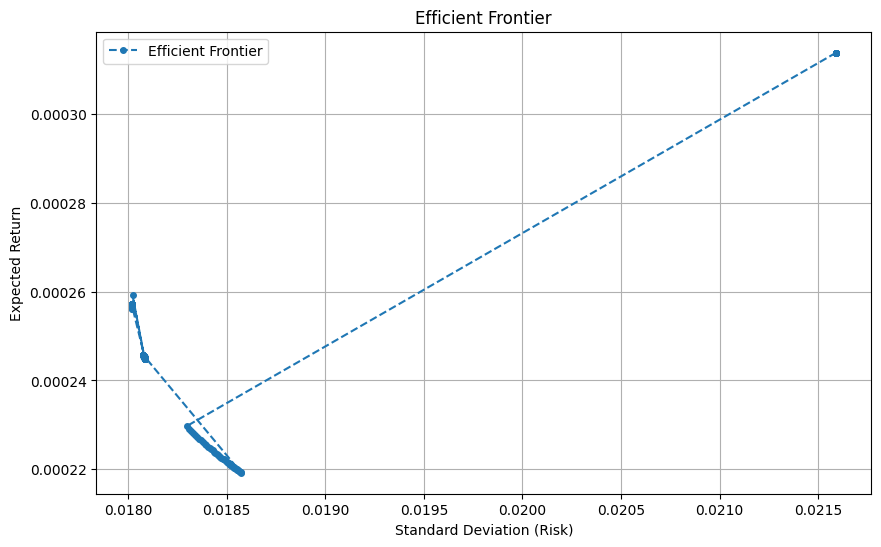

In [38]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from typing import Tuple, Callable

mu = expected_returns
n = len(mu)
Sigma = covariance_matrix

def portfolio_variance(weights: np.ndarray, Sigma: np.ndarray) -> float:
    """
    Compute the variance of a portfolio.

    Parameters:
    - weights (np.ndarray): The weights of the assets in the portfolio.
    - Sigma (np.ndarray): The covariance matrix of the asset returns.

    Returns:
    - float: The variance of the portfolio.
    """
    return np.dot(weights.T, np.dot(Sigma, weights))

def portfolio_return(weights: np.ndarray, mu: np.ndarray) -> float:
    """
    Compute the expected return of a portfolio.

    Parameters:
    - weights (np.ndarray): The weights of the assets in the portfolio.
    - mu (np.ndarray): The expected returns of the assets.

    Returns:
    - float: The expected return of the portfolio.
    """
    return np.dot(weights.T, mu)

def optimize_portfolio(lamb: float, mu: np.ndarray, Sigma: np.ndarray, n: int) -> Tuple[np.ndarray, float, float]:
    """
    Optimize the portfolio for a given risk aversion coefficient.

    Parameters:
    - lamb (float): The risk aversion coefficient.
    - mu (np.ndarray): The expected returns of the assets.
    - Sigma (np.ndarray): The covariance matrix of the asset returns.
    - n (int): The number of assets.

    Returns:
    - Tuple[np.ndarray, float, float]: Optimal weights, expected return, and standard deviation of the optimized portfolio.
    """
    # Objective function: Minimize negative utility.
    def objective(weights: np.ndarray) -> float:
        return -portfolio_return(weights, mu) + lamb * portfolio_variance(weights, Sigma) / 2
    
        # Constraints: Weights sum to 1
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    
    # Bounds for weights
    bounds = tuple((0, 1) for _ in range(n))
    
    # Initial guess
    initial_guess = np.ones(n) / n
    
    # Optimization
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        optimal_weights = result.x
        opt_return = portfolio_return(optimal_weights, mu)
        opt_variance = portfolio_variance(optimal_weights, Sigma)
        opt_stddev = np.sqrt(opt_variance)
        return optimal_weights, opt_return, opt_stddev
    else:
        raise ValueError("Optimization failed.")
    
# Initialize lists to store the optimal portfolio's expected return and standard deviation.
optimal_returns = []
optimal_stddevs = []

# Loop over each lambda in Lambda to find the optimal portfolio.
for lamb in Lambda:
    try:
        # Optimize the portfolio for the current lambda.
        optimal_weights, opt_return, opt_stddev = optimize_portfolio(lamb, mu, Sigma, n)
        
        # Store the optimal portfolio's expected return and standard deviation.
        optimal_returns.append(opt_return)
        optimal_stddevs.append(opt_stddev)
    except ValueError as e:
        print(f"Optimization failed for lambda = {lamb}: {e}")

# Plot the efficient frontier.
plt.figure(figsize=(10, 6))
plt.plot(optimal_stddevs, optimal_returns, 'o--', markersize=4, label='Efficient Frontier')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.legend()
plt.grid(True)
plt.show()